In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv, DataFrame
import datetime
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

In [3]:
dataset = read_csv('opendata.csv',',', index_col=['date'], parse_dates=['date'])

In [4]:
dataset.head()

,name,region,value
date,,,
2013-01-15,Количество заявок на потребительские кредиты,Россия,571147
2013-02-15,Количество заявок на потребительские кредиты,Россия,504508
2013-03-15,Количество заявок на потребительские кредиты,Россия,628803
2013-04-15,Количество заявок на потребительские кредиты,Россия,836054
2013-05-15,Количество заявок на потребительские кредиты,Россия,867235


In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 74842 entries, 2013-01-15 to 2018-11-15
Data columns (total 3 columns):
name      74842 non-null object
region    74842 non-null object
value     74842 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


In [5]:
ds_region = pd.DataFrame(data=dataset.region.unique(), columns=['region'])

In [6]:
regions = len(ds_region)
for i in range(regions):
    print(i," ",ds_region.loc[i].region)

0   Россия
1   Алтайский край
2   Амурская область
3   Архангельская область
4   Астраханская область
5   Белгородская область
6   Брянская область
7   Владимирская область
8   Волгоградская область
9   Вологодская область
10   Воронежская область
11   Еврейская автономная область
12   Забайкальский край
13   Ивановская область
14   Иркутская область
15   Кабардино-Балкарская Республика
16   Калининградская область
17   Калужская область
18   Камчатский край
19   Кемеровская область
20   Кировская область
21   Костромская область
22   Краснодарский край
23   Красноярский край
24   Курганская область
25   Курская область
26   Ленинградская область
27   Липецкая область
28   Магаданская область
29   Москва
30   Московская область
31   Мурманская область
32   Ненецкий автономный округ
33   Нижегородская область
34   Новгородская область
35   Новосибирская область
36   Омская область
37   Оренбургская область
38   Орловская область
39   Пензенская область
40   Пермский край
41   Приморский

In [22]:
s_reg = input('Введите номер региона: \n')
n_reg = int(s_reg)
v_reg = ds_region.loc[n_reg].region
print("Вы выбрали : ", v_reg)

Введите номер региона: 
76
Вы выбрали :  Хабаровский край


In [23]:
ds_name = pd.DataFrame(data=dataset.name.unique(), columns=['pokazat'])

In [24]:
ds_name

,pokazat
0,Количество заявок на потребительские кредиты
1,Средняя сумма заявки на потребительский кредит
2,Количество заявок на ипотечные кредиты
3,Средняя сумма заявки на ипотечный кредит
4,Количество новых депозитов
5,Средняя сумма нового депозита
6,Средняя зарплата
7,Средняя пенсия
8,В среднем руб. на текущем счете на человека
9,В среднем депозитов в руб. на человека


In [25]:
s_name = input('Введите номер показателя: \n')
n_name = int(s_name)
v_name = ds_name.loc[n_name].pokazat
print("Вы выбрали : ", v_name)

Введите номер показателя: 
6
Вы выбрали :  Средняя зарплата


In [27]:
print("Возможен выбор дат из диапазона: ",dataset.index.min()," - ", dataset.index.max())
s_dat1 = input('Введите начальную дату YYYY-MM-DD :')
year, month, day = map(int, s_dat1.split('-'))
date1 = datetime.date(year, month, day)

s_dat2 = input('Введите конечную дату YYYY-MM-DD :')
year, month, day = map(int, s_dat2.split('-'))
date2 = datetime.date(year, month, day)
print("Вы выбрали : ", date1, " : ", date2)

Возможен выбор дат из диапазона:  2013-01-15 00:00:00  -  2019-01-15 00:00:00
Введите начальную дату YYYY-MM-DD :2017-01-01
Введите конечную дату YYYY-MM-DD :2018-12-31
Вы выбрали :  2017-01-01  :  2018-12-31


In [28]:
df = dataset.query("region == @v_reg & name == @v_name & date >= @date1 & date <= @date2")

In [36]:
df.head()

,name,region,value
date,,,
2017-01-15,Средняя зарплата,Хабаровский край,25829
2017-02-15,Средняя зарплата,Хабаровский край,34137
2017-03-15,Средняя зарплата,Хабаровский край,34759
2017-04-15,Средняя зарплата,Хабаровский край,35104
2017-05-15,Средняя зарплата,Хабаровский край,35854


In [30]:
import warnings
warnings.filterwarnings('ignore')

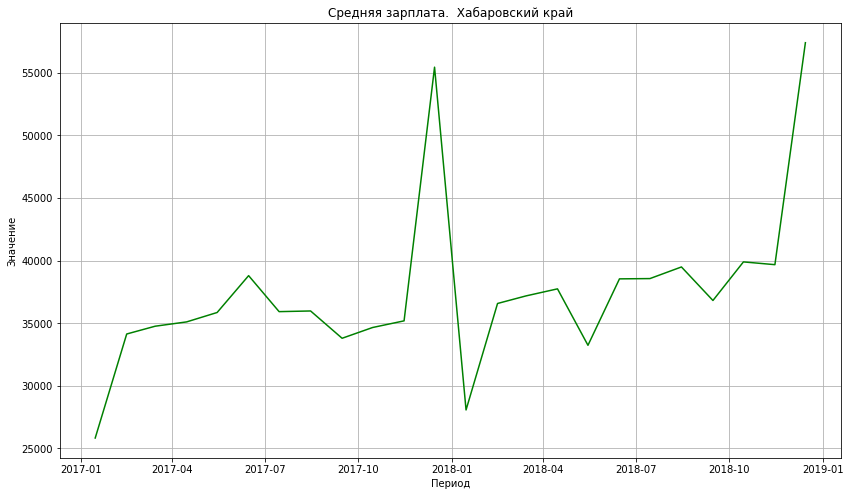

In [33]:
plt.figure(figsize=(14, 8))
plt.plot(df.index, df['value'], color="green")
plt.title(v_name+".  "+v_reg)
plt.ylabel('Значение');
plt.xlabel('Период');
plt.grid()
plt.show()